<a href="https://colab.research.google.com/github/Shovon198915/CSE475/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#1. Load Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
           "gill-attachment", "gill-spacing", "gill-size", "gill-color",
           "stalk-shape", "stalk-root", "stalk-surface-above-ring",
           "stalk-surface-below-ring", "stalk-color-above-ring",
           "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
           "ring-type", "spore-print-color", "population", "habitat"]
df = pd.read_csv(url, names=columns)

#2. Exploratory Data Analysis (EDA)

In [ ]:
print("Dataset Shape:", df.shape)
print("\nMissing values (stalk-root '?'):", (df['stalk-root'] == '?').sum())

Dataset Shape: (8124, 23)

Missing values (stalk-root '?'): 2480


Visualizing class distribution

/tmp/ipython-input-1752004526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='magma')


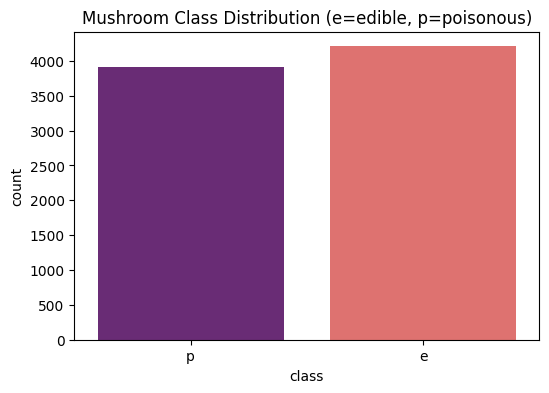

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='magma')
plt.title('Mushroom Class Distribution (e=edible, p=poisonous)')
plt.show()

Visualizing Odor

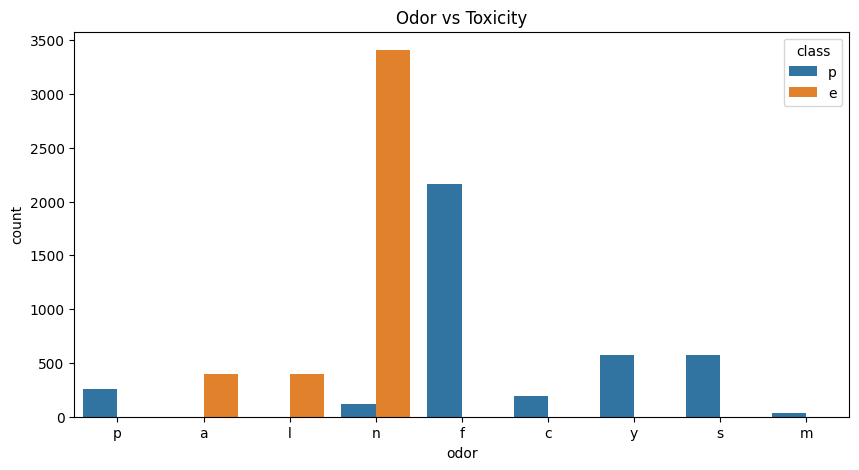

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='odor', hue='class', data=df)
plt.title('Odor vs Toxicity')
plt.show()

#3. Preprocessing

In [ ]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1)
y = df['class']

# 80/20 Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Random Forest: n_estimators Comparison


--- Evaluating Random Forest n_estimators ---
n_estimators: 1 | Accuracy: 0.9415
n_estimators: 50 | Accuracy: 0.9803
n_estimators: 100 | Accuracy: 0.9828
n_estimators: 150 | Accuracy: 0.9815
n_estimators: 200 | Accuracy: 0.9815
n_estimators: 250 | Accuracy: 0.9828


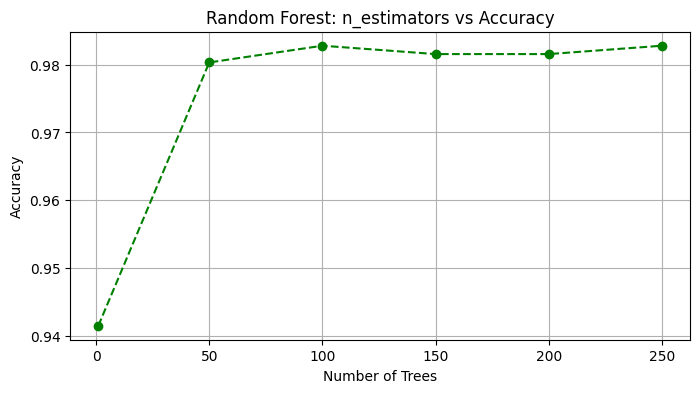

In [ ]:
estimators = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

print("\n--- Evaluating Random Forest n_estimators ---")
for n in estimators:
    # Adding max_depth=3 to prevent overfitting
    rf = RandomForestClassifier(n_estimators=n, max_depth=3, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    rf_accuracies.append(acc)
    print(f"n_estimators: {n} | Accuracy: {acc:.4f}")


    # Plotting Comparison
plt.figure(figsize=(8, 4))
plt.plot(estimators, rf_accuracies, marker='o', linestyle='--', color='green')
plt.title('Random Forest: n_estimators vs Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 5. Model Comparison (DT vs RF)

In [ ]:
# Decision Tree with regularization
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Best Random Forest
rf_final = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_final.fit(X_train, y_train)
rf_pred = rf_final.predict(X_test)

print("\n--- Final Performance Comparison ---")
print(f"Decision Tree Accuracy:  {accuracy_score(y_test, dt_pred):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")




--- Final Performance Comparison ---
Decision Tree Accuracy:  0.9489
Random Forest Accuracy: 0.9828


Plotting Decision Tree

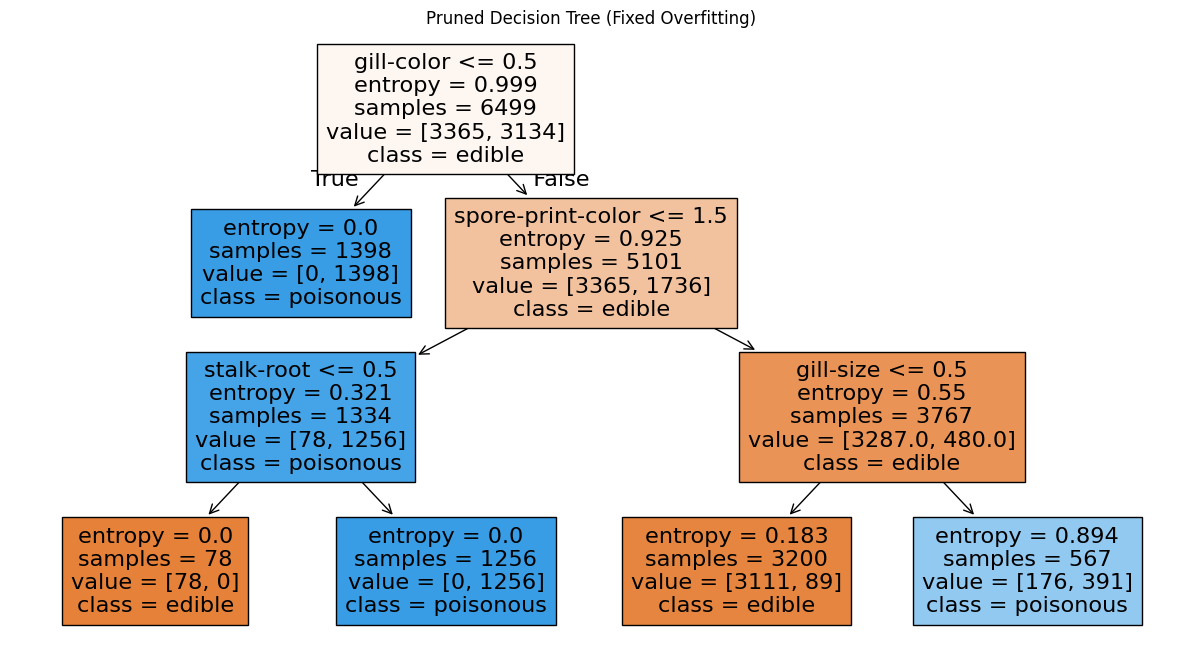

In [ ]:

plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title('Pruned Decision Tree (Fixed Overfitting)')
plt.show()


Confusion Matrix

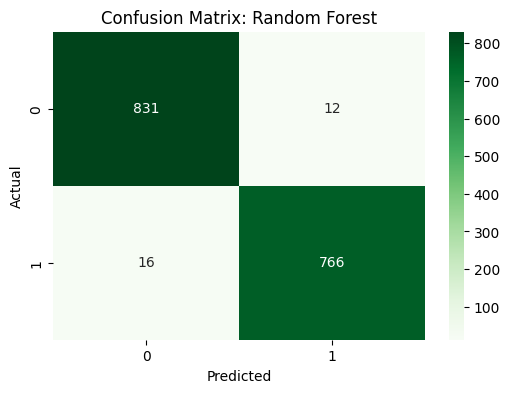

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()